### Generating some time series analysis of NYPD Felony Incidents data

TO DO:
* Figure out how to center labels for Month and Day of Week
* Figure out how to only show max 31 days for Day of Month

In [132]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.ticker as tkr
import datetime as dt
% matplotlib inline

In [3]:
#load in nyc felony data for analysis
felony_df = pd.read_csv("NYPD_7_Major_Felony_Incidents.csv")

In [4]:
#creating a new column to strip off Time from Occurrence Date
felony_df['Short Occurrence Date']= pd.to_datetime(felony_df['Occurrence Date'])
felony_df['Short Occurrence Date'] = [d.strftime('%Y-%m-%d') if not pd.isnull(d) else '' for d in felony_df['Short Occurrence Date']]

In [5]:
#removing data prior to 2006
felony_df_2006 = felony_df[felony_df["Occurrence Year"]>2005]
#there are some dates that have a year of 2006 and higher but a date of 1900, removing these as well
felony_df_2006 = felony_df[felony_df["Short Occurrence Date"]>'2005-12-31'] 

In [213]:
month_order = {'Jan':'01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 
               'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
felony_df_2006['Occurrence Month Ordered'] = [month_order[m] + ' ' + m for m in felony_df_2006['Occurrence Month']]

C:\Users\sriva\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [238]:
day_order = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
felony_df_2006['Day of Week Ordered'] = [str(day_order[d]) + ' ' + d for d in felony_df_2006['Day of Week']]

C:\Users\sriva\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [239]:
#groupby by several parameters for plots
datecount = felony_df_2006.groupby('Short Occurrence Date', as_index=False)['OBJECTID'].count()
yearcount = felony_df_2006.groupby('Occurrence Year', as_index=False)['OBJECTID'].count()
monthcount = felony_df_2006.groupby('Occurrence Month Ordered', as_index=False)['OBJECTID'].count()
daycount = felony_df_2006.groupby('Occurrence Day', as_index=False)['OBJECTID'].count()
weekdaycount = felony_df_2006.groupby('Day of Week Ordered', as_index=False)['OBJECTID'].count()
offensecount = felony_df_2006.groupby('Offense', as_index=False)['OBJECTID'].count()
yearoffensecount = felony_df_2006.groupby(['Occurrence Year', 'Offense'], as_index=False)['OBJECTID'].count()

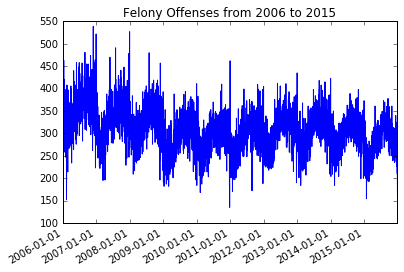

In [176]:
#get a time series view of the number of offenses per day
dates = datecount["Short Occurrence Date"]
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y = datecount["OBJECTID"]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.title('Felony Offenses from 2006 to 2015')

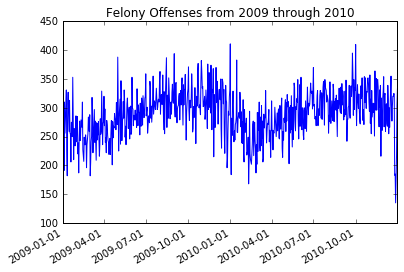

In [177]:
#ther is an evident seasonal spike and valley in felonies each year
#the below shows a view for 2009 through 2010
datecount_2010 = datecount[datecount['Short Occurrence Date'] > '2008-12-31']
datecount_2010 = datecount_2010[datecount_2010['Short Occurrence Date'] < '2011-01-01']

dates = datecount_2010["Short Occurrence Date"]
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
y = datecount_2010["OBJECTID"]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.title('Felony Offenses from 2009 through 2010')
#looks like the number of felonies spike in September/October and then fall back down at the end of each calendar year

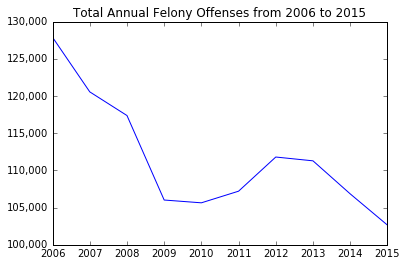

In [179]:
#this shows a decline in the number of felonies recorded from 2006 to 2015
#same graph as aaron had with the x axis labels as the years and y ticks labaels formatted
x = yearcount['Occurrence Year']
xlabels = [int(xl) for xl in x]
y = yearcount["OBJECTID"]

def func(x, pos):  
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func) 
plt.xticks(x, xlabels)
plt.gca().yaxis.set_major_formatter(y_format)
plt.plot(x,y)
plt.title('Total Annual Felony Offenses from 2006 to 2015')

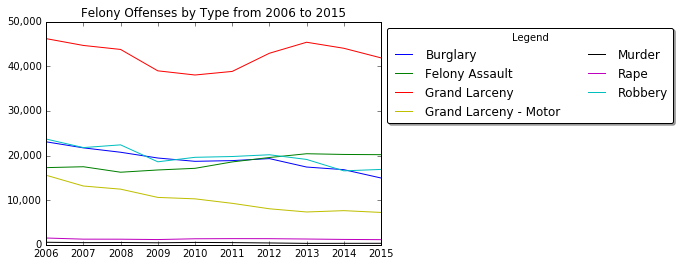

In [180]:
#wanted to see a breakout of the type of offenses across years
x = yearoffensecountp.index
xlabels = [int(xl) for xl in x]
yb = yearoffensecountp["BURGLARY"]
yfa = yearoffensecountp["FELONY ASSAULT"]
ygl = yearoffensecountp["GRAND LARCENY"]
yglmv = yearoffensecountp["GRAND LARCENY OF MOTOR VEHICLE"]
ymm = yearoffensecountp["MURDER & NON-NEGL. MANSLAUGHTE"]
yr = yearoffensecountp["RAPE"]
yrb = yearoffensecountp["ROBBERY"]

def func(x, pos):  
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func) 
plt.xticks(x, xlabels)
plt.gca().yaxis.set_major_formatter(y_format)

plt.plot(x, yb, 'b-', label='Burglary')
plt.plot(x, yfa, 'g-', label='Felony Assault')
plt.plot(x, ygl, 'r-', label='Grand Larceny')
plt.plot(x, yglmv, 'y-', label='Grand Larceny - Motor')
plt.plot(x, ymm, 'k-', label='Murder')
plt.plot(x, yr, 'm-', label='Rape')
plt.plot(x, yrb, 'c-', label='Robbery')

plt.legend(loc="best", bbox_to_anchor=[1, 1],
           ncol=2, shadow=True, title="Legend", fancybox=True)
plt.title('Felony Offenses by Type from 2006 to 2015')
plt.show()

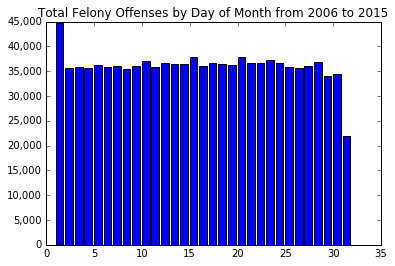

In [202]:
#here is a look of total felony offenses by day of week
#looks like the first of the month has the highest offenses - about 10,000 more than any other day
#perhaps this is just the busiest day to record offenses?
#31 doesn't have as many offenses since not all months have 31 days - most likely
x = daycount['Occurrence Day']
y = daycount['OBJECTID']
plt.gca().yaxis.set_major_formatter(y_format)
plt.bar(x,y)
plt.title('Total Felony Offenses by Day of Month from 2006 to 2015')

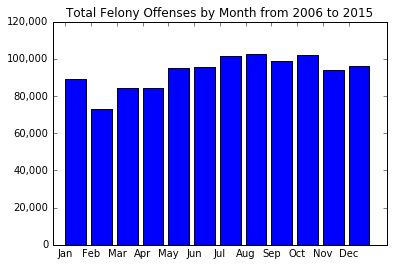

In [236]:
#breaking out the offenses by month total, it does look a bit seasonal and similar to the time series chart above
#February has the least number of offenses - potentially due to the cold weather in nyc
#need to determine how to center the month x axis tick labels
x = range(len(monthcount['Occurrence Month Ordered']))
xlabels = [x[-3:] for x in monthcount['Occurrence Month Ordered']]
y = monthcount['OBJECTID']
plt.xticks(x, xlabels)
plt.gca().yaxis.set_major_formatter(y_format)
plt.gca().set_xlim(-0.5,len(xlabels)+0.5)
locs = np.arange(len(xlabels))
plt.bar(x,y)
plt.title('Total Felony Offenses by Month from 2006 to 2015')
plt.show()

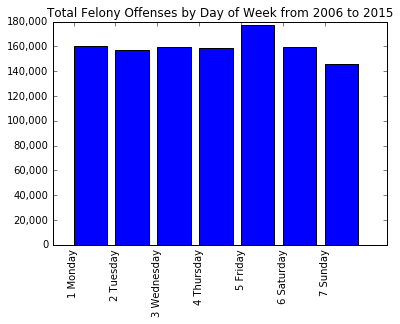

In [249]:
#breaking out offenses by day of week, Friday spikes with almost 20,000 more offenses than any other day
x = range(len(weekdaycount['Day of Week Ordered']))
xlabels = [x for x in weekdaycount['Day of Week Ordered']]
y = weekdaycount['OBJECTID']
plt.xticks(x, xlabels, rotation='vertical')
plt.gca().yaxis.set_major_formatter(y_format)
plt.gca().set_xlim(-0.5,len(xlabels)+0.5)
plt.bar(x,y)
plt.title('Total Felony Offenses by Day of Week from 2006 to 2015')
plt.show()